In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


importing all the necessary Python libraries for data handling (pandas, numpy) and visualizations (matplotlib, seaborn).



In [81]:
walmart_df = pd.read_csv('Walmart.csv')
walmart_df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


reading the raw Walmart dataset to see the first few rows and get a feel for the structure. The data contains columns like walmart braches which is define by different code and the cities they operate with their prices, quanity sold, date, time , different method through which payment was made and etc.

Data Exploration



In [82]:
walmart_df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


Checking statistics of the all the numerical columns using describe function.

In [83]:
walmart_df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

checking data types of each columns 

In [84]:
walmart_df.shape

(10051, 11)

checking how many rows and columns dataset include.

In [85]:
walmart_df['invoice_id'].isna().sum()

np.int64(0)

checking how many missing (NaN) values are in the invoice_id column.

In [86]:
walmart_df['Branch'].isna().sum()

np.int64(0)

We're checking how many missing (NaN) values are in the Branch column.

In [87]:
walmart_df['City'].isna().sum()

np.int64(0)

We're checking how many missing (NaN) values are in the City column.

In [88]:
walmart_df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

This shows us how many missing values each column has. It’s an important step before cleaning the data.



In [89]:
walmart_df['unit_price'].isnull().sum()

np.int64(31)

We're checking how many missing (NaN) values are in the Unit Price column.

Data Cleaning

In [90]:
walmart_df['unit_price'] = walmart_df['unit_price'].astype(str)

We’re converting the unit_price column to strings so we can remove any unwanted symbols like dollar signs.

In [91]:
walmart_df['unit_price'] = walmart_df['unit_price'].astype(str).str.replace('[\$]','',regex=True).str.strip()

This line removes the dollar sign ($) and any extra spaces from the unit_price values to clean up the format.

In [92]:
walmart_df['unit_price'] = pd.to_numeric(walmart_df['unit_price'],errors='coerce')

We’re converting the cleaned strings back to numeric values. If any value still can’t be converted, it will be set as NaN (missing), which we can handle later.

In [93]:
walmart_df['unit_price'].describe()

count    10020.000000
mean        50.630053
std         21.197783
min         10.080000
25%         32.000000
50%         51.000000
75%         69.000000
max         99.960000
Name: unit_price, dtype: float64

This gives us basic statistics like the mean, median, and range for the unit_price column. It helps us understand the overall price distribution.

In [94]:
unitprice_mean = walmart_df['unit_price'].mean() 
unitprice_median = walmart_df['unit_price'].median()
print(unitprice_mean,unitprice_median)

50.63005289421158 51.0


We’re calculating and printing the average (mean) and the middle value (median) of the unit prices. This helps us see if the data is skewed — for example, if the mean is much higher than the median.

In [95]:
walmart_df[walmart_df['unit_price'].isnull()].head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
1892,1893,WALM024,Carrollton,Home and lifestyle,NaN,NaN,09/06/23,16:09:00,Ewallet,9.0,0.48
1893,1894,WALM009,Plano,Fashion accessories,NaN,NaN,02/08/22,22:11:00,Ewallet,4.0,0.48
1894,1895,WALM010,Laredo,Home and lifestyle,NaN,NaN,01/08/23,12:06:00,Ewallet,4.0,0.48
1895,1896,WALM069,Rockwall,Fashion accessories,NaN,NaN,21/07/23,15:49:00,Ewallet,4.0,0.33
1896,1897,WALM093,Angleton,Home and lifestyle,NaN,NaN,15/05/22,12:36:00,Ewallet,9.0,0.33


Here we’re displaying the first few rows where the unit_price is missing. This helps us quickly review the records with NaN values.

In [96]:
# replace na values to its mean value 

walmart_df['unit_price'] = walmart_df['unit_price'].fillna(unitprice_mean)
walmart_df['unit_price'].isnull().sum()

np.int64(0)

We’re replacing all missing values in the unit_price column with the column’s average value. 

In [97]:
walmart_df['unit_price'].isnull().sum()

np.int64(0)

We’re checking again to make sure there are no more missing values in the unit_price column after filling them.

In [98]:
walmart_df['quantity'].isnull().sum()

np.int64(31)

We’re checking how many missing values are in the quantity column. This helps us decide how to clean it.

In [99]:
quantity_mean = walmart_df['quantity'].mean()
quantity_median = walmart_df['quantity'].median()

print(quantity_mean,quantity_median)

2.353493013972056 2.0


We’re calculating both the mean and median of the quantity column. These values will help us decide how to replace the missing data — in this case, we’ll use the median.

In [100]:
walmart_df[walmart_df['quantity'].isna()].head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
1892,1893,WALM024,Carrollton,Home and lifestyle,50.630053,NaN,09/06/23,16:09:00,Ewallet,9.0,0.48
1893,1894,WALM009,Plano,Fashion accessories,50.630053,NaN,02/08/22,22:11:00,Ewallet,4.0,0.48
1894,1895,WALM010,Laredo,Home and lifestyle,50.630053,NaN,01/08/23,12:06:00,Ewallet,4.0,0.48
1895,1896,WALM069,Rockwall,Fashion accessories,50.630053,NaN,21/07/23,15:49:00,Ewallet,4.0,0.33
1896,1897,WALM093,Angleton,Home and lifestyle,50.630053,NaN,15/05/22,12:36:00,Ewallet,9.0,0.33


We’re previewing the rows where quantity is missing to better understand the context of the missing data.

In [101]:
walmart_df['quantity'] = walmart_df['quantity'].fillna(quantity_median)
walmart_df['quantity'].isnull().sum()

np.int64(0)

We’re filling all missing values in the quantity column using the median.

In [102]:
walmart_df[walmart_df['quantity'] == quantity_median].head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
8,9,WALM066,Grapevine,Health and beauty,36.26,2.0,10/01/19,17:15:00,Credit card,7.2,0.33
19,20,WALM013,Irving,Home and lifestyle,40.30,2.0,11/03/19,15:30:00,Ewallet,4.4,0.48
22,23,WALM083,Farmers Branch,Home and lifestyle,33.20,2.0,15/03/19,12:20:00,Credit card,4.4,0.33
27,28,WALM046,Temple,Fashion accessories,87.67,2.0,10/03/19,12:17:00,Credit card,7.7,0.48
33,34,WALM096,Eagle Pass,Health and beauty,96.58,2.0,15/03/19,10:12:00,Credit card,5.1,0.18


This filters the dataset to show all rows where the quantity equals the median value. Useful for checking the distribution after imputation.

In [103]:
walmart_df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

We do a final check across all columns to ensure there are no missing values left in the dataset before saving or analysis.

In [104]:
walmart_df.duplicated().sum()

np.int64(51)

This checks how many rows in the dataset are exact duplicates of previous rows. If any are found, we may want to remove them to avoid skewing our analysis.


In [105]:
duplicated_rows = walmart_df[walmart_df.duplicated(keep=False)]
duplicated_sortede = duplicated_rows.sort_values(by=walmart_df.columns.to_list())
duplicated_sortede

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
9949,9950,WALM038,Sugar Land,Fashion accessories,17.0,1.0,27/11/23,9:15:00,Cash,3.0,0.48
10000,9950,WALM038,Sugar Land,Fashion accessories,17.0,1.0,27/11/23,9:15:00,Cash,3.0,0.48
9950,9951,WALM082,Weslaco,Home and lifestyle,58.0,2.0,08/07/20,12:39:00,Cash,6.0,0.33
10001,9951,WALM082,Weslaco,Home and lifestyle,58.0,2.0,08/07/20,12:39:00,Cash,6.0,0.33
9951,9952,WALM035,San Angelo,Fashion accessories,76.0,3.0,02/10/21,16:34:00,Cash,6.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...
10048,9998,WALM050,Victoria,Fashion accessories,52.0,3.0,15/06/23,16:00:00,Credit card,4.0,0.48
9998,9999,WALM032,Tyler,Home and lifestyle,79.0,2.0,25/02/21,12:25:00,Cash,7.0,0.48
10049,9999,WALM032,Tyler,Home and lifestyle,79.0,2.0,25/02/21,12:25:00,Cash,7.0,0.48
9999,10000,WALM069,Rockwall,Fashion accessories,62.0,3.0,26/09/20,9:48:00,Cash,3.0,0.33


We’re identifying all duplicate rows in the dataset — not just the second instance, but all copies, Then, we sort them by all columns to view them neatly. This helps us inspect exactly which records are repeated.

In [106]:

walmart_df.drop_duplicates(inplace=True)
walmart_df.duplicated().sum()

np.int64(0)

We drop all duplicate rows from the dataset using drop_duplicates(). After that, we check again to confirm that no duplicates remain.

In [107]:


walmart_df['date'] = pd.to_datetime(walmart_df['date'])
walmart_df.dtypes

/tmp/ipykernel_1478/2177290742.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  walmart_df['date'] = pd.to_datetime(walmart_df['date'])


invoice_id                 int64
Branch                    object
City                      object
category                  object
unit_price               float64
quantity                 float64
date              datetime64[ns]
time                      object
payment_method            object
rating                   float64
profit_margin            float64
dtype: object

We make sure the date column is in the proper datetime format. This is important for time-based analysis later. Then we check the data types of all columns to confirm the change.


In [108]:
walmart_df['date'].head()

0   2019-05-01
1   2019-08-03
2   2019-03-03
3   2019-01-27
4   2019-08-02
Name: date, dtype: datetime64[ns]

This displays the first 5 values from the date column.

In [109]:

walmart_df.columns = walmart_df.columns.str.lower()
walmart_df.columns


Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

We’re converting all column names to lowercase. This helps keep things consistent and avoids errors when typing column names later in the code.

In [112]:
new_order = [
    'invoice_id', 'branch', 'city', 'category', 'payment_method', 'date', 'time',
    'unit_price', 'quantity', 'rating', 'profit_margin'
]


walmart_df= walmart_df[new_order]


We're rearranging the columns in a more logical order to make the dataset easier to read and analyze. This doesn't affect the data itself — just the order in which the columns appear.

In [113]:
walmart_df.drop(columns=['time'],inplace =True)

Dropping Time column

In [114]:
walmart_df.head()

,invoice_id,branch,city,category,payment_method,date,unit_price,quantity,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,Ewallet,2019-05-01,74.69,7.0,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,Cash,2019-08-03,15.28,5.0,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,Credit card,2019-03-03,46.33,7.0,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,Ewallet,2019-01-27,58.22,8.0,8.4,0.33
4,5,WALM013,Irving,Sports and travel,Ewallet,2019-08-02,86.31,7.0,5.3,0.48


EDA

In [115]:

walmart_df['total_price'] = walmart_df['unit_price'] * walmart_df['quantity']
walmart_df.head()

,invoice_id,branch,city,category,payment_method,date,unit_price,quantity,rating,profit_margin,total_price
0,1,WALM003,San Antonio,Health and beauty,Ewallet,2019-05-01,74.69,7.0,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,Cash,2019-08-03,15.28,5.0,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,Credit card,2019-03-03,46.33,7.0,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,Ewallet,2019-01-27,58.22,8.0,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,Ewallet,2019-08-02,86.31,7.0,5.3,0.48,604.17


We’re creating a new column called total_price by multiplying the unit_price by the quantity for each transaction

In [116]:

payment_summary = walmart_df.groupby('payment_method').agg(
    no_payments=('payment_method', 'count'),
    no_qty_sold=('quantity', 'sum')
).reset_index()

print(payment_summary)


  payment_method  no_payments  no_qty_sold
0           Cash         1832       4984.0
1    Credit card         4257       9569.0
2        Ewallet         3911       8992.0


We’re grouping the data by payment_method to see:

How many total transactions were made with each method (no_payments)

The total quantity of items sold through each method (no_qty_sold)

This helps us understand which payment methods are most popular and which drive more product sales.

In [117]:

walmart_df.head()

avg_rating = walmart_df.groupby(['branch','category'])['rating'].mean().reset_index()

highest_rated = avg_rating.loc[avg_rating.groupby('branch')['rating'].idxmax()]
highest_rated['rating'] = highest_rated['rating'].round(2)
highest_rated.head()


,branch,category,rating
0,WALM001,Electronic accessories,7.45
6,WALM002,Food and beverages,8.25
14,WALM003,Sports and travel,7.50
17,WALM004,Food and beverages,9.30
23,WALM005,Health and beauty,8.37


First, we calculate the average rating for each category within each branch.
Then, for each branch, we find the category with the highest average rating.
Finally, we round the ratings to 2 decimal places and show the top results.

This helps identify which product categories customers rate best in each store branch.

In [118]:

unitprice_per_category = walmart_df.groupby('category').agg({
    'unit_price' : ['min','max','mean']
})

unitprice_per_category

unit_price                  
                              min    max       mean
category                                           
Electronic accessories      10.56  99.73  51.636683
Fashion accessories         10.18  99.89  50.126247
Food and beverages          10.13  99.79  56.008851
Health and beauty           10.08  99.96  54.854474
Home and lifestyle          10.53  99.92  50.444619
Sports and travel           10.17  99.96  56.993253

We’re calculating the minimum, maximum, and average unit price for each product category.
This gives us a quick comparison of pricing across categories.

In [119]:

city_summary = walmart_df.groupby('city')['total_price'].sum().sort_values(ascending=False)
city_summary.head()

city
Weslaco        46351.790000
Waxahachie     40703.330000
Plano          25890.860212
San Antonio    24950.560000
Richardson     24561.860106
Name: total_price, dtype: float64

We calculate the total revenue (total_price) for each city and sort them in descending order. This helps us identify which cities are contributing the most in sales.

In [120]:
walmart_df.head()

,invoice_id,branch,city,category,payment_method,date,unit_price,quantity,rating,profit_margin,total_price
0,1,WALM003,San Antonio,Health and beauty,Ewallet,2019-05-01,74.69,7.0,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,Cash,2019-08-03,15.28,5.0,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,Credit card,2019-03-03,46.33,7.0,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,Ewallet,2019-01-27,58.22,8.0,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,Ewallet,2019-08-02,86.31,7.0,5.3,0.48,604.17


In [ ]:

walmart_df['year'] = pd.to_datetime(walmart_df['date']).dt.year
walmart_df.head()

,invoice_id,branch,city,category,payment_method,date,unit_price,quantity,rating,profit_margin,total_price,year
0,1,WALM003,San Antonio,Health and beauty,Ewallet,2019-05-01,74.69,7.0,9.1,0.48,522.83,2019
1,2,WALM048,Harlingen,Electronic accessories,Cash,2019-08-03,15.28,5.0,9.6,0.48,76.40,2019
2,3,WALM067,Haltom City,Home and lifestyle,Credit card,2019-03-03,46.33,7.0,7.4,0.33,324.31,2019
3,4,WALM064,Bedford,Health and beauty,Ewallet,2019-01-27,58.22,8.0,8.4,0.33,465.76,2019
4,5,WALM013,Irving,Sports and travel,Ewallet,2019-08-02,86.31,7.0,5.3,0.48,604.17,2019


We extract the year number from the date column so we can group and filter the data by time in our dashboard. This is useful for things like showing sales trends over months or filtering by year.

In [ ]:

walmart_df['month'] = pd.to_datetime(walmart_df['date']).dt.month

walmart_df['month'].unique()

array([ 5,  8,  3,  1,  2, 10,  6,  9, 12,  7, 11,  4], dtype=int32)

We extract the month number from the date column so we can group and filter the data by time in our dashboard. This is useful for things like showing sales trends over months or filtering by year.

In [ ]:

walmart_df['date'] = pd.to_datetime(walmart_df['date'], format="ISO8601")

month_map = {
    1:'january',2:'febuary',3:'march',4:'april',
    5:'may',6:'june',7:'july',8:'august',
    9:'september',10:'october',11:'november',
    12:'december'
}

walmart_df['month'] = walmart_df['date'].dt.month.map(month_map)
walmart_df.tail()


,invoice_id,branch,city,category,payment_method,date,unit_price,quantity,rating,profit_margin,total_price,year,month
9995,9996,WALM056,Rowlett,Fashion accessories,Cash,2023-03-08,37.0,3.0,3.0,0.33,111.0,2023,march
9996,9997,WALM030,Richardson,Home and lifestyle,Cash,2021-02-22,58.0,2.0,7.0,0.48,116.0,2021,febuary
9997,9998,WALM050,Victoria,Fashion accessories,Credit card,2023-06-15,52.0,3.0,4.0,0.48,156.0,2023,june
9998,9999,WALM032,Tyler,Home and lifestyle,Cash,2021-02-25,79.0,2.0,7.0,0.48,158.0,2021,febuary
9999,10000,WALM069,Rockwall,Fashion accessories,Cash,2020-09-26,62.0,3.0,3.0,0.33,186.0,2020,september


We map each numeric month (1 to 12) to its name using a dictionary (month_map). This makes charts and filters easier to read for users.
Now, instead of seeing "3", users will see "march" — which is more intuitive in a dashboard.



EDA and Visualization

In [ ]:

top_category = walmart_df.groupby('category')['quantity'].sum()
top_category.sort_values() 



category
Health and beauty          854.0
Sports and travel          920.0
Food and beverages         952.0
Electronic accessories    1494.0
Home and lifestyle        9642.0
Fashion accessories       9683.0
Name: quantity, dtype: float64

We group the data by category and sum up the total quantity sold in each one. Sorting it helps us clearly see which categories sold the most and which sold the least.

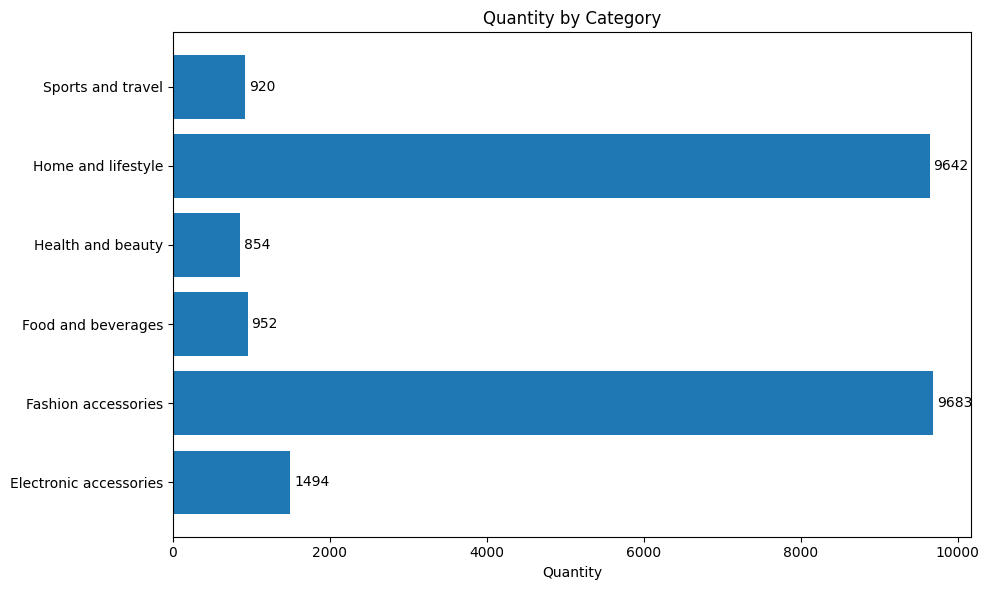

In [ ]:

plt.figure(figsize=(10,6))
bars = plt.barh(top_category.index,top_category.values)
plt.xlabel('Quantity')
plt.title('Quantity by Category')

for bar in bars:
    width = bar.get_width()
    plt.text(width +50,bar.get_y() + bar.get_height()/2,f'{width:.0f}',va = 'center')


plt.tight_layout()
plt.show()

We’re creating a horizontal bar chart to visually show how many units were sold in each category.
Labels are added to each bar so it’s easy to read the exact quantity, making the chart more informative.



In [138]:
# total transaction by payment methoh

payment_method = walmart_df.groupby('payment_method')['invoice_id'].nunique()
payment_method.sort_values(ascending=False)



payment_method
Credit card    4257
Ewallet        3911
Cash           1832
Name: invoice_id, dtype: int64

We group the dataset by payment_method and count the number of unique transactions (based on invoice_id) for each one. Sorting the results helps us see which payment methods are used most often.



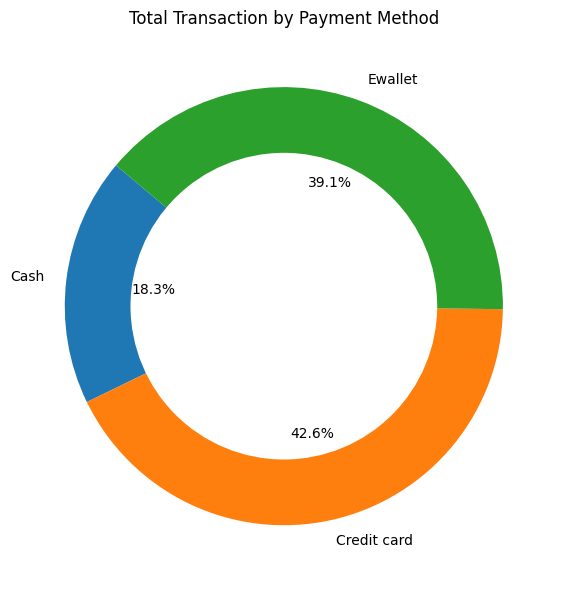

In [139]:
# donut chart for above code
labels = payment_method.index 
values = payment_method.values 

plt.figure(figsize = (6,6))
wedges,texts,autotexts = plt.pie(values,labels = labels,
                                 autopct='%1.1f%%',
                                 startangle=140)

center_circle = plt.Circle((0,0),0.70,fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Total Transaction by Payment Method')
plt.tight_layout()
plt.show()

We’re creating a donut-style pie chart to visualize the share of transactions by each payment method.
The white circle in the center gives it the donut effect, and percentage labels help us quickly compare the sizes.

In [ ]:

line_chart = walmart_df.groupby('month')['total_price'].sum()
line_chart = line_chart.round(0)
line_chart


month
april         50190.0
august        83478.0
december     185445.0
febuary      109719.0
january      144434.0
july          55444.0
june          58415.0
march        115861.0
may           57641.0
november     184276.0
october       81391.0
september     86573.0
Name: total_price, dtype: float64

We group the data by month and calculate the total revenue (total_price) for each one.
Then we round the values to whole numbers to keep the chart clean and easy to read.

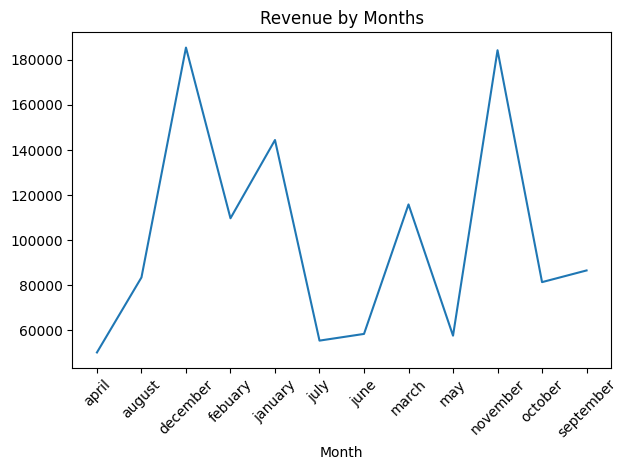

In [153]:
plt.Figure(figsize=(10,8))
fig4 = plt.plot(line_chart.index,
                line_chart.values)

plt.xlabel('Month')
plt.title('Revenue by Months')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()


We’re plotting monthly revenue using a line chart to visualize trends over time. This helps us spot peak and low-performing months at a glance.

Saving Dataset for Streamlit Dashboards

In [154]:

walmart_df.to_csv('walmartcleaned_datafile.csv',index=False)